Source

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Automatic detection of outliers

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/


In [1]:
# The dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sci-kit learn for spliiting the data into train and test sets
from sklearn.model_selection import train_test_split
#Importing the RF model from scikit learn
from sklearn.ensemble import RandomForestRegressor
#Tools for visualizing the decision tree
from sklearn.tree import export_graphviz
import pydot
import png
import tempfile
from PIL import Image
import datetime

In [2]:
# Reading the csv file
file = "/Users/pw/Desktop/StatisticalAnalysis/RandomForest/temps.csv"

df = pd.read_csv(file)

In [3]:
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
#Identify missing values / anomalies
print(' The df shape is:', df.shape)

 The df shape is: (348, 12)


In [5]:
#Using descriptive statistics to identify anomalies
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
# Using box plots to spot outliers / anomalies
def box_plot(df, colName):
    fig,ax = plt.subplots(figsize=(10,7))
    
    ax.grid(color='grey', axis='y', linestyle='-',
            linewidth=0.25, alpha=0.5)
    
    ax.set_title(colName)
    
    plt.boxplot(df[colName])
    
    plt.show()

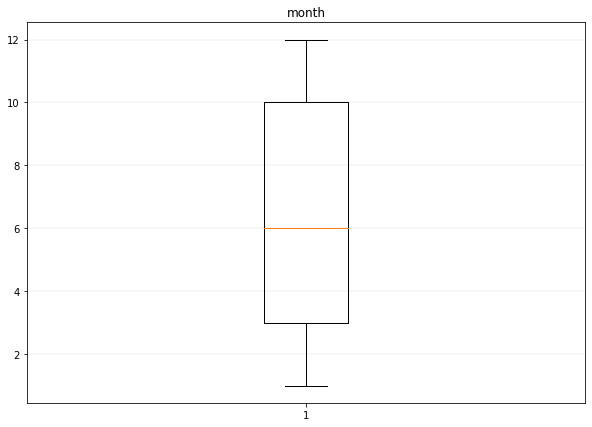

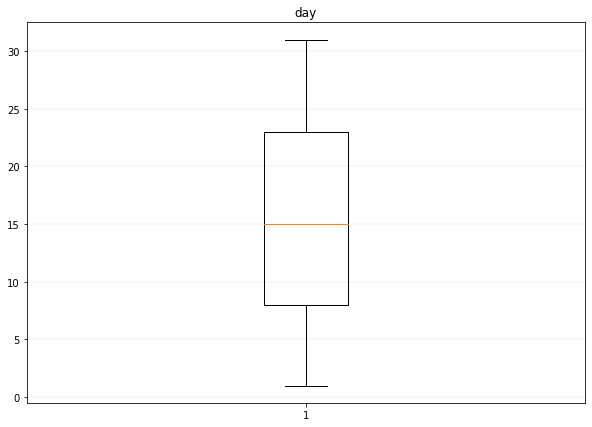

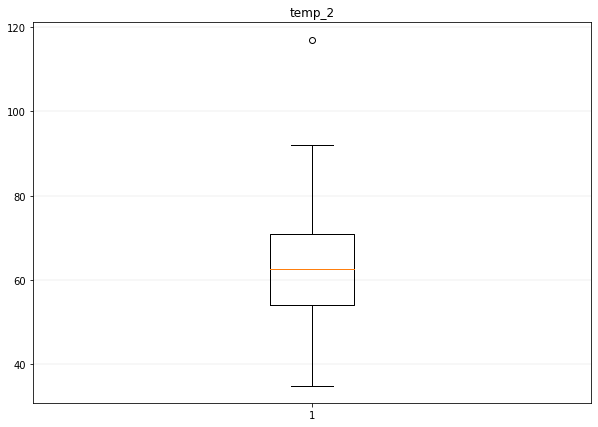

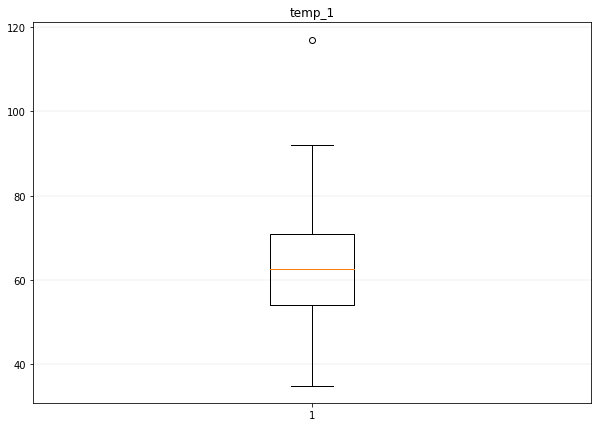

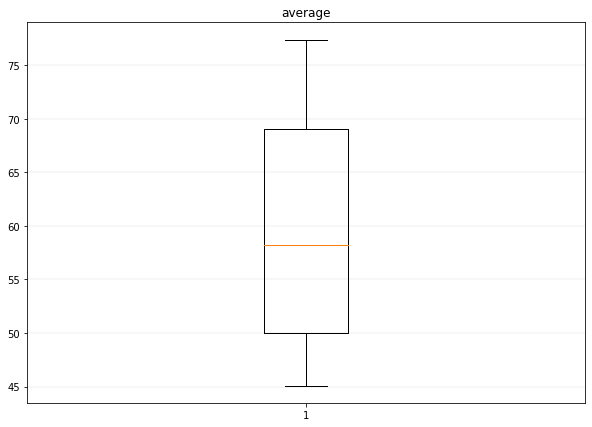

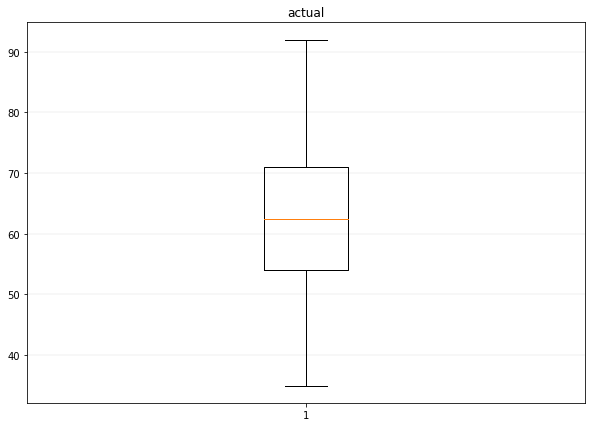

In [7]:
columns = ['month','day','temp_2','temp_1','average','actual']

for column in columns:
    box_plot(df,column)

In [8]:
#Plotting a line chart for the temperature values against the month 

def chart_plot(df, colName1, colName2):
    
    fig,ax = plt.subplots(figsize=(10,7))
    
    ax.grid(color='grey', axis='y', linestyle='-',
            linewidth=0.25, alpha=0.5)
    
    ax.set_title(colName2)
    
    
    plt.plot(df[colName1], df[colName2], color = 'red', marker ='*')
    
    plt.show()
    
    
    

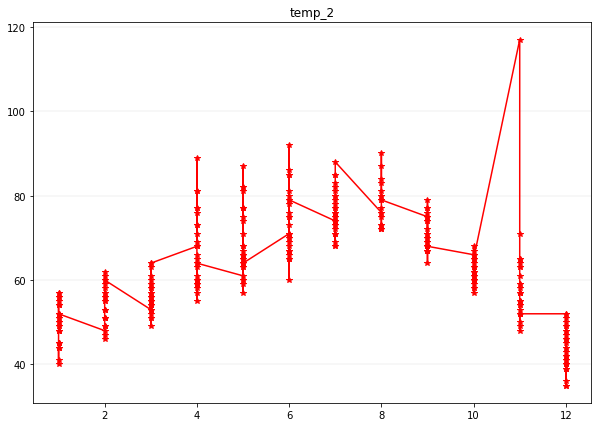

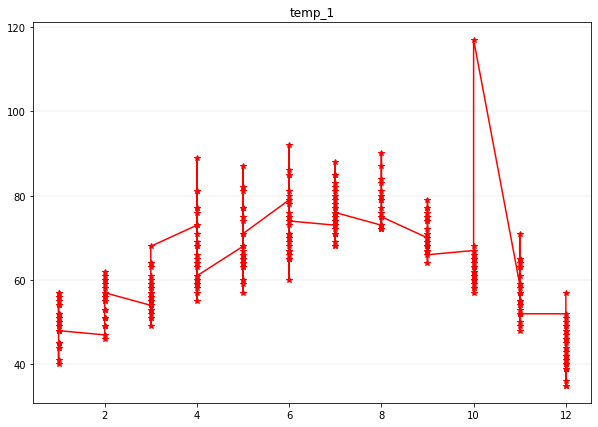

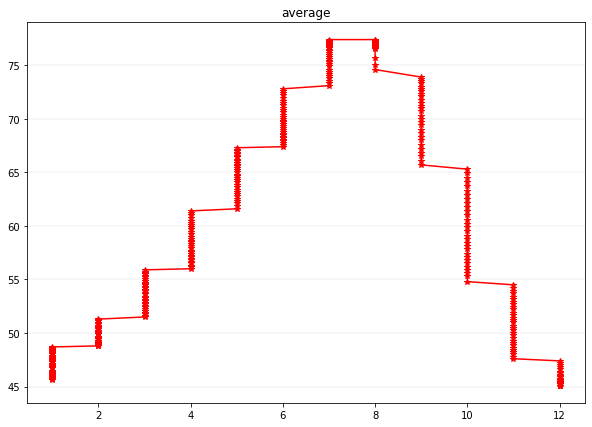

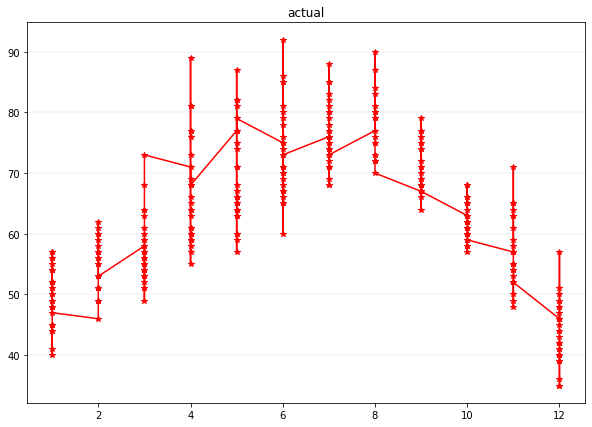

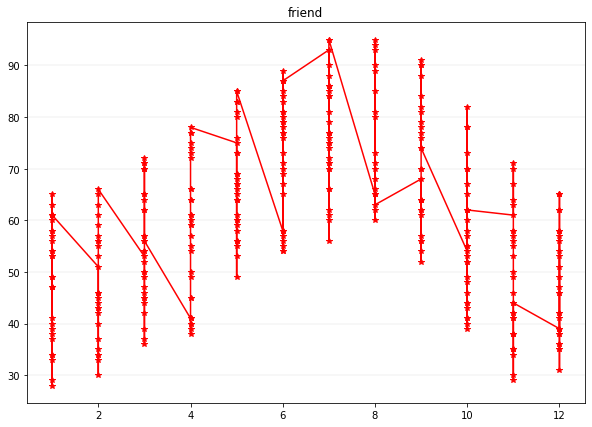

In [9]:
columns = ['temp_2','temp_1','average','actual','friend']
colName1 = 'month'

for column in columns:
    chart_plot(df,colName1,column)

In [10]:
#One hot encoding for the categorical variable using pd.get_dummies
df = pd.get_dummies(df)

In [11]:
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [12]:
#Seperating the data into labels and targets and converting the sets into arrays
# Labels as the value that we want to predict
labels = np.array(df['actual'])

#Features are the predictors
features = df.drop('actual', axis = 1)

#Save the feature list for later use

feature_list = list(features.columns)

#convert the df to numpy array
features = np.array(features)


In [13]:
#Creating the train and test sets using scikit-learn
train_features, test_features, train_labels, test_labels = train_test_split(
features,labels, test_size = 0.2, random_state = 42)

# Establishing a baseline

this refers to a measure we hope to beat with our model, otherwise it will be a failure. we use the average temperature as the base prediction. Our model should be better than this

In our case, our  goal is to beat an average baseline error of 5.09

In [14]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:,feature_list.index('average')]

#Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.09


# Train the model

in this section we use the random forest regressor for training / fiting the model

In [15]:
#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model using the training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# Making predictions using the model

In [16]:
predictions = rf.predict(test_features)

#Calculate the absolute errors
errors = abs(predictions - test_labels)

#Print out the mean absolute error (mae)
print('Mean absolute error; ', round(np.mean(errors), 2), 'degrees')

Mean absolute error;  3.89 degrees


# Perfomance Matrics (MAPE)

In [17]:
MAPE = 100* (errors / test_labels)

accuracy = 100 - np.mean(MAPE)

print('Accuracy: ', round(accuracy, 2), '%.' )

Accuracy:  93.85 %.


# Visualizing the tree on a limited / specified depth

In [18]:
#Pull out one tree from the forest
tree = rf.estimators_[5]

#Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list,
               rounded = True, precision = 1)

#Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

#fout = tempfile.NamedTemporaryFile(suffix=".png")
#graph.write(fout.name,format="png")
#Image.open(fout.name).show()
#Write the graoh to a png file

#graph.write('/Users/pw/Desktop/StatisticalAnalysis/RandomForest/tree.png', format='png')

In [19]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)

rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

#graph.write_png('small_tree.png');

# Variable Importance

In [20]:
#Get numerical feature importances
importances = list(rf.feature_importances_)

#List of tupples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature,
                      importance in zip(feature_list, importances)]


#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                            reverse = True)


#Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.67
Variable: average              Importance: 0.15
Variable: forecast_acc         Importance: 0.05
Variable: forecast_noaa        Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


# Visualizations

In [21]:
#Training with two most important variables
rf_most_important = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#Extract two most important features
important_indices = [feature_list.index('temp_1'),
                    feature_list.index('average')]
train_important = train_features[:,important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

#Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

#Display the performance metrics
print('Mean Absolute Error: ', round(np.mean(errors),2),'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error:  3.93 degrees.
Accuracy: 93.73 %.


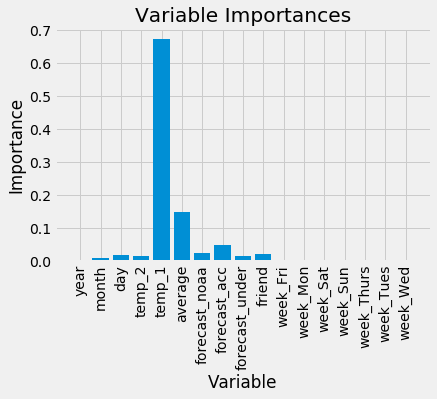

In [22]:
#Plotting the important features
#Set the plot style

plt.style.use ('fivethirtyeight')

# List of x locations for plotting

x_values = list(range(len(importances)))

#Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

#Tick labels for x-axis
plt.xticks(x_values, feature_list, rotation = 'vertical')

#Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable');
plt.title('Variable Importances');

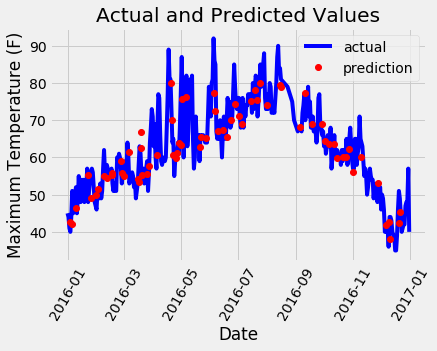

In [23]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + 
              '-' + str(int(day)) for year, month, day in zip(years, months, days)]


# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d')
              for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 
                                        'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', 
         label = 'actual')


# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', 
         label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); 
plt.title('Actual and Predicted Values');

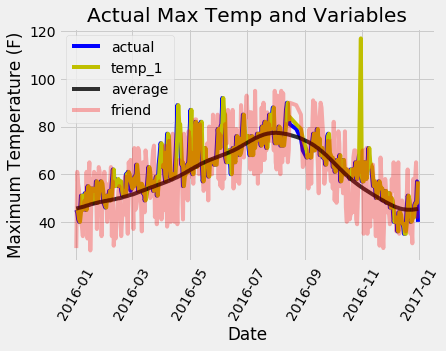

In [24]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', 
         label = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', 
         label = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', 
         label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', 
         label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); 
plt.title('Actual Max Temp and Variables');